# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Логнормальное распределение

f(x, s) = $\frac{1}{s x \sqrt{2\pi}}
          \exp\left(-\frac{\log^2(x)}{2s^2}\right)$ - функция плотности распределения


https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Cоздадим выборку sample с 1000 значениями, имеющими логнормальное распределение 

In [4]:
sigma = 0.3 
mu = 2
scale = np.exp(mu) 
lognorm = sts.lognorm(s = sigma, scale=scale) 
sample = lognorm.rvs(size=1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины 

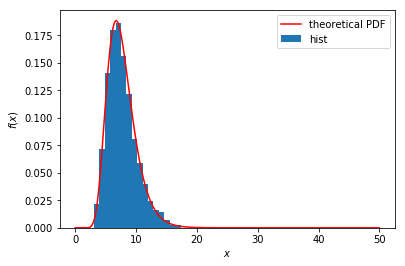

In [21]:
# строим гистограмму
plt.hist(sample, bins=20, label='hist', density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

#нарисуем плотность распределения
x = np.linspace(0,50,1000)
pdf=lognorm.pdf(x)
plt.plot(x, pdf, label='theoretical PDF', alpha=1, color='red')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')



plt.legend()

Расчитаем теоретические мат.ожидание и дисперсию и предскажем эти значения согласно ЦПТ для будущих нормальных распределений при объёмах выборок n = 10, 50, 100, 150

Мат. ожидание и дисперсия логнормального распределения:

E(x) = $\exp^{\mu + \sigma^2/2}$

D(x) = ($\exp^{\sigma^2}$-1)*$\exp^{2\mu+\sigma^2}$

In [23]:
# мат. ожидание и дисперсиz по формулам

mean = np.exp(mu + (sigma**2)/2)
variance = ((np.exp(sigma**2) - 1)*np.exp(2*mu+sigma**2))
std = np.sqrt(variance)
print(mean, variance)

7.72915853790988 5.625961509864716


In [24]:
# вычисление среднеквадратического отклонения по ЦПТ, вычислим её для значений n = 10, 50, 100, 150

def std_n(n):
    y = np.sqrt(variance / n) 
    return y

std_n(10), std_n(50), std_n(100), std_n(150)

(0.7500640979186189,
 0.3354388620856181,
 0.23719109405423966,
 0.19366571732179336)

При значениях n = 10, 50, 100, 150 сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних и функции плотности, используя полученные на предыдущем шаге значения  

In [25]:
def func(n):
    y = []
    for i in range(1000): 
        y.append((lognorm.rvs(size=n)).mean())
    return y

In [26]:
def print_hist(n):
    sample_mean = func(n)
    
    # сгенерируем выборку с нормальным распределением, где:
    # loc -  теоретическое значение mean для логнормального распределения
    # scale - функцию подсчёта среднеквадратического отклонения учётом вычисленного значения дисперсии логнормального распределеления

    norm_rv = sts.norm(loc=mean, scale=std_n(n))
    sample = norm_rv.rvs(size=n)
    df = pd.DataFrame(sample, columns=['Theoretical PDF'])
    ax = df.plot(kind='density')

    # нарисуем гистограмму распределений выборочных средних
    plt.hist(sample_mean, bins=25, label='hist', density=True)
    
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

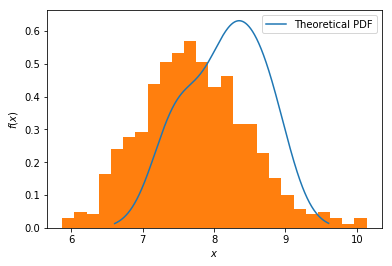

In [28]:
print_hist(10)

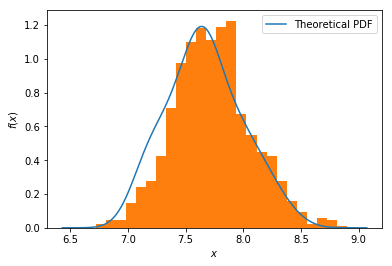

In [31]:
print_hist(50)

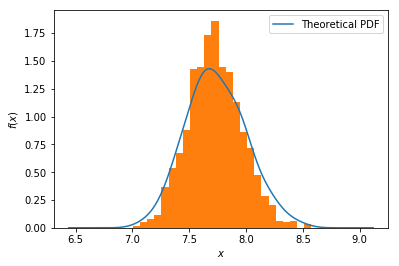

In [32]:
print_hist(100)

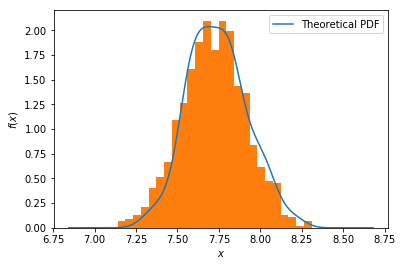

In [33]:
print_hist(150)

Вывод: с увеличением n (объёма выборки) распределение средних выборочных стремится к нормальному распределению, т.е. точность аппроксимации увеличивается, что и является утверждением Центральной Предельной Теоремы